## Polynomial Regression

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Increasing the size of all graphs 
plt.rcParams['figure.figsize'] = 16, 10

In [2]:
# Suppressing unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
rows, columns = dataset.shape
# We specify [:, 1:2] instead of just [:,1] because we want X to be a matrix and not just a vector of values
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, (columns - 1)].values
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Checking out the values of X and y
print("X Values")
print(X[:5])
print("\nY Values")
print(y[:5])

X Values
[[1]
 [2]
 [3]
 [4]
 [5]]

Y Values
[ 45000  50000  60000  80000 110000]


**Note:** We are not going to split the data into training set and test set
because we do not have too much data to make this division and we need to
make a very accurate prediction.

##### Fitting Linear Regression to the dataset
This is similar to the Simple Linear Regression. We are doing this just to
compare the results with the Polynomial Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
linearRegressor = LinearRegression()
linearRegressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

##### Fitting Polynomial Regression to the dataset
We are going to use the PolynomialFeatures class with a degree of 2 or 4 to create polynomial features for the X matrix. We can change the degree to fit the regression line better to the model

In [6]:
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree=4)
# We transform our features X to X_poly with a certain degree of terms added.
X_poly = polyReg.fit_transform(X)

This will add X^2 term to our X data set and also add an intercept of 1 which some models require.

In [7]:
polyLinearReg = LinearRegression()
polyLinearReg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
# Predicting Results with Linear Regression model
# Predicting the salary of level 6.5 employee
print(linearRegressor.predict(6.5))

[ 330378.78787879]


In [9]:
# Predicting Results with Polynomial Regression model
# Predicting the salary of level 6.5 employee
print(polyLinearReg.predict(polyReg.fit_transform(6.5)))

[ 158862.45265153]


###### Visualizing the Linear Regression results


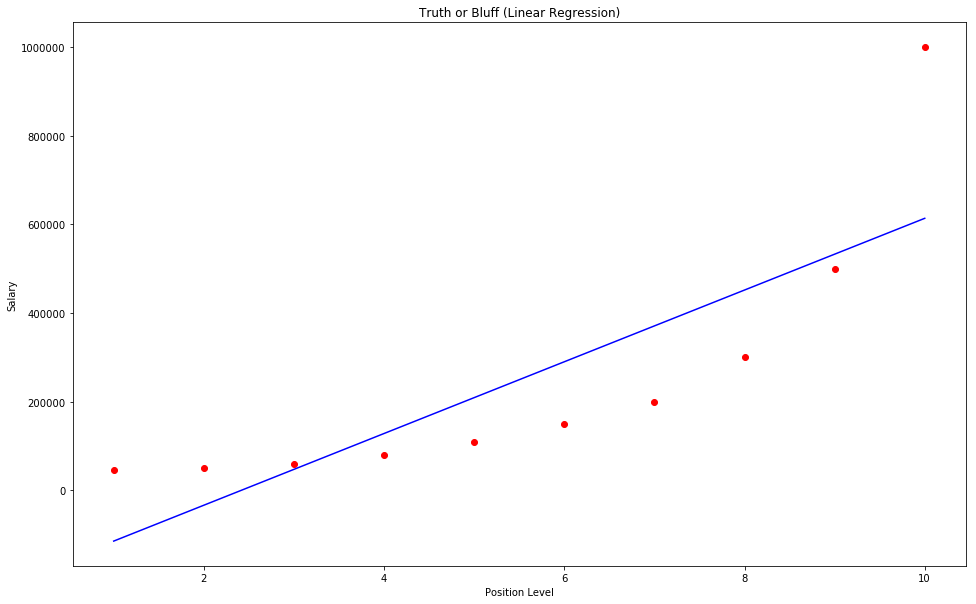

In [10]:
plt.scatter(X, y, color="red")
plt.plot(X, linearRegressor.predict(X), color="blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

###### Visualizing the Polynomial Regression results

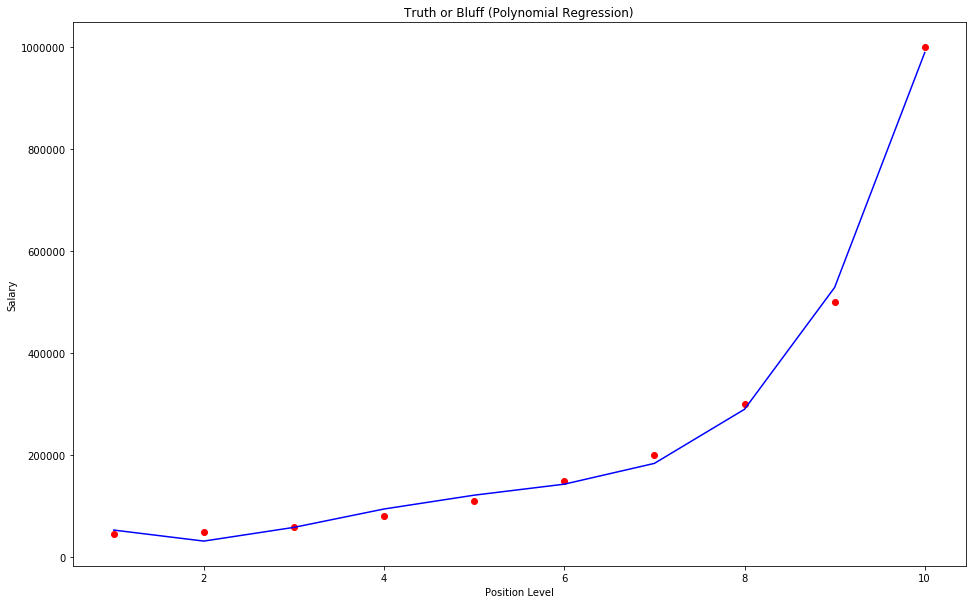

In [11]:
plt.scatter(X, y, color="red")
plt.plot(X, polyLinearReg.predict(polyReg.fit_transform(X)), color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

###### Better Visualizing the Polynomial Regression results
We are trying to make the curve more smooth by introducing a range of values for X. This is just to plot the data better.

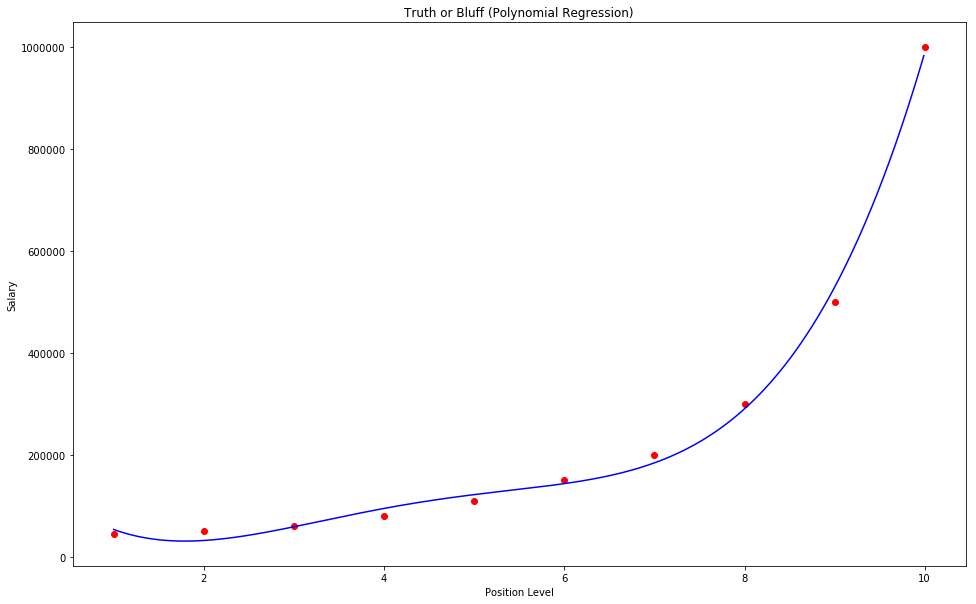

In [12]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color="red")
plt.plot(X_grid, polyLinearReg.predict(polyReg.fit_transform(X_grid)),
         color="blue")
plt.title("Truth or Bluff (Polynomial Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()